1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('employee_promotion.csv')

In [5]:
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [9]:
data.describe()


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [11]:
data.drop([ 'employee_id', 'region'], axis=1, inplace=True)

In [13]:
data['Eligible_for_Promotion'] = np.where((data['age'] > 30) & (data['length_of_service'] > 5), 'eligible', 'not eligible')

In [15]:
data


,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,Eligible_for_Promotion
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0,eligible
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,60.0,0,not eligible
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0,eligible
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,50.0,0,eligible
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,73.0,0,not eligible
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0,eligible
54804,Operations,Master's & above,f,other,1,37,2.0,6,0,56.0,0,eligible
54805,Analytics,Bachelor's,m,other,1,27,5.0,3,0,79.0,0,not eligible
54806,Sales & Marketing,NaN,m,sourcing,1,29,1.0,2,0,NaN,0,not eligible


In [17]:
data.isna().sum()

department                   0
education                 2409
gender                       0
recruitment_channel          0
no_of_trainings              0
age                          0
previous_year_rating      4124
length_of_service            0
awards_won                   0
avg_training_score        2560
is_promoted                  0
Eligible_for_Promotion       0
dtype: int64

In [19]:
data.interpolate(inplace=True)
data.dropna(inplace=True)

In [21]:
data.isna().sum()

department                0
education                 0
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
previous_year_rating      0
length_of_service         0
awards_won                0
avg_training_score        0
is_promoted               0
Eligible_for_Promotion    0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52399 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   department              52399 non-null  object 
 1   education               52399 non-null  object 
 2   gender                  52399 non-null  object 
 3   recruitment_channel     52399 non-null  object 
 4   no_of_trainings         52399 non-null  int64  
 5   age                     52399 non-null  int64  
 6   previous_year_rating    52399 non-null  float64
 7   length_of_service       52399 non-null  int64  
 8   awards_won              52399 non-null  int64  
 9   avg_training_score      52399 non-null  float64
 10  is_promoted             52399 non-null  int64  
 11  Eligible_for_Promotion  52399 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 5.2+ MB


In [25]:

le = LabelEncoder()
data['department'] = le.fit_transform(data['department'])
data['education'] = le.fit_transform(data['education'])
data['gender'] = le.fit_transform(data['gender'])
data['recruitment_channel'] = le.fit_transform(data['recruitment_channel'])
data['Eligible_for_Promotion'] = le.fit_transform(data['Eligible_for_Promotion'])


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52399 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   department              52399 non-null  int32  
 1   education               52399 non-null  int32  
 2   gender                  52399 non-null  int32  
 3   recruitment_channel     52399 non-null  int32  
 4   no_of_trainings         52399 non-null  int64  
 5   age                     52399 non-null  int64  
 6   previous_year_rating    52399 non-null  float64
 7   length_of_service       52399 non-null  int64  
 8   awards_won              52399 non-null  int64  
 9   avg_training_score      52399 non-null  float64
 10  is_promoted             52399 non-null  int64  
 11  Eligible_for_Promotion  52399 non-null  int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 4.2 MB


In [29]:
# Define feature matrix (X) and target variable (y)
X = data[['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score','is_promoted']]

# Ensure the target variable name is correct
y = data['Eligible_for_Promotion']  # Update if column name differs


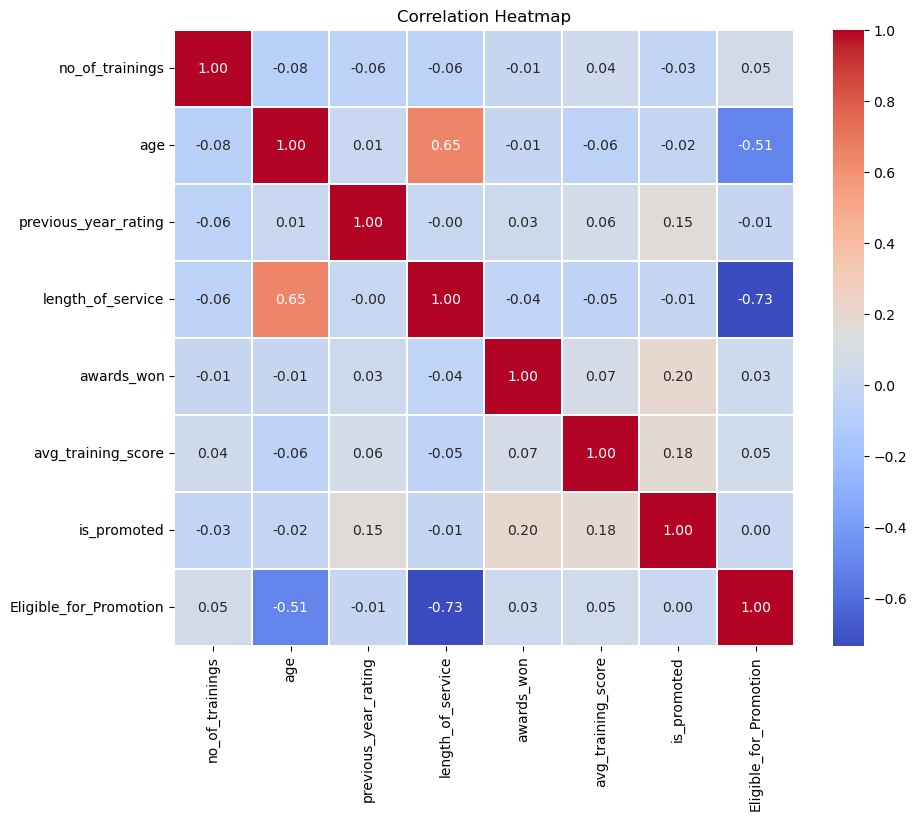

In [31]:
X_numeric = X[['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
               'awards_won', 'avg_training_score','is_promoted']].copy() 
X_numeric['Eligible_for_Promotion'] = y
corr = X_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2)
plt.title("Correlation Heatmap")
plt.show()


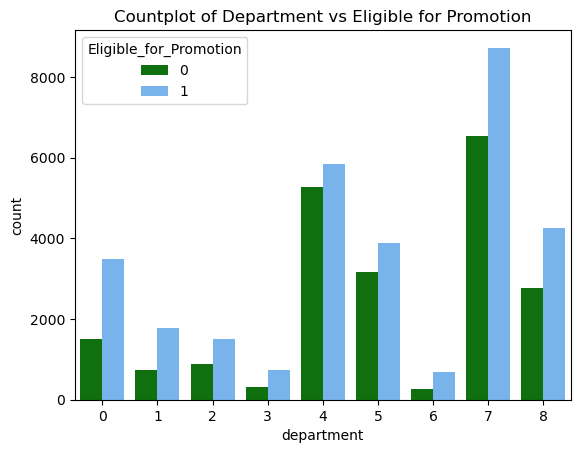

In [33]:
# Convert target variable to string if necessary
data['Eligible_for_Promotion'] = data['Eligible_for_Promotion'].astype(str)

# Create count plot
sns.countplot(x='department', hue='Eligible_for_Promotion', data=data,palette=['green', '#66b3ff'])  # Custom colors


# Corrected title format
plt.title('Countplot of Department vs Eligible for Promotion')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.show()


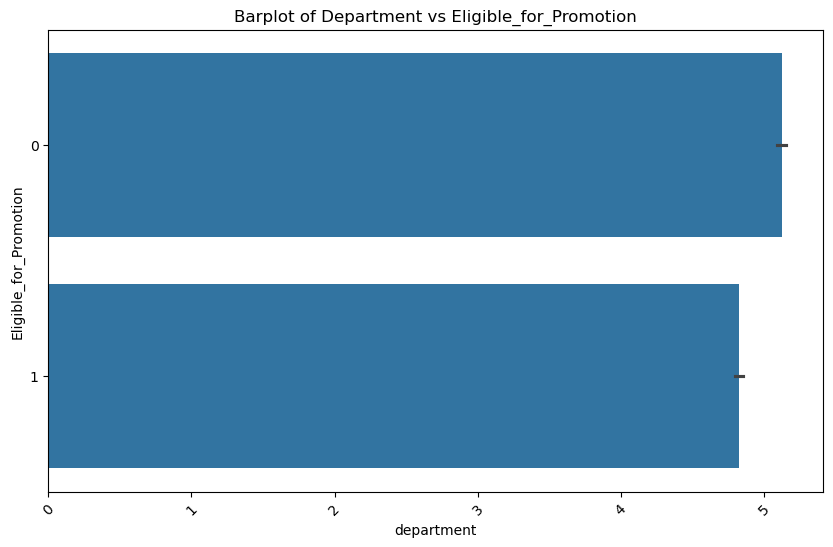

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Removed extra closing bracket "]"
sns.barplot(x='department', y='Eligible_for_Promotion', data=data)  

plt.title('Barplot of Department vs Eligible_for_Promotion')
plt.xticks(rotation=45)  # Adjust rotation for better readability

plt.show()


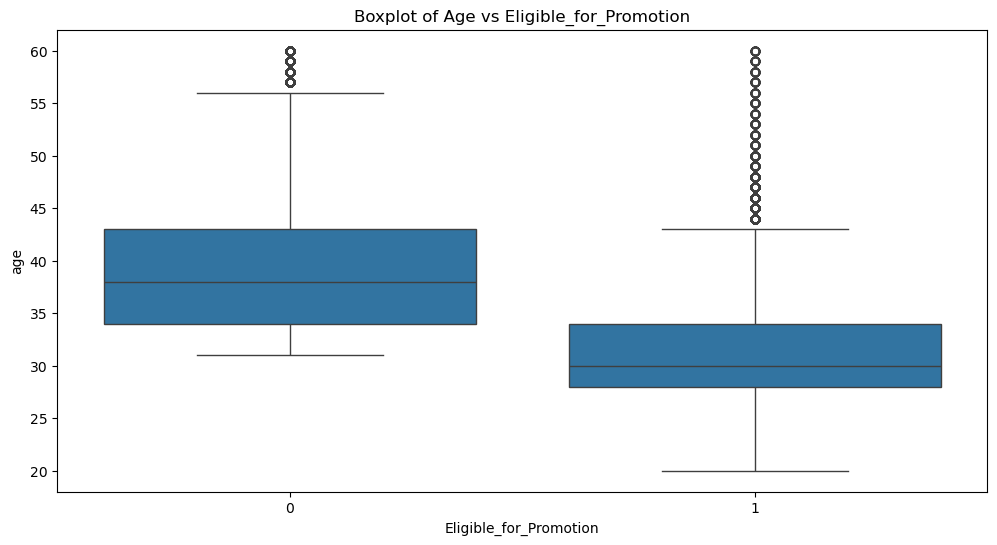

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Eligible_for_Promotion', y='age', data=data)
plt.title('Boxplot of Age vs Eligible_for_Promotion')
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
MM = MinMaxScaler()
X_train = MM.fit_transform(X_train)
X_test = MM.fit_transform(X_test)

In [43]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [45]:
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.9305343511450381

In [47]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [49]:
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [51]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [55]:
df = pd.read_csv('employee_promotion.csv')

In [57]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


In [59]:
df['Eligible_for_Promotion'] = np.where((data['age'] > 30) & (df['length_of_service'] > 5), 'eligible', 'not eligible')

In [61]:
df['Eligible_for_Promotion'].isna().sum()

0

In [63]:
X = df.drop('Eligible_for_Promotion',axis=1)
y = df['Eligible_for_Promotion'].map({'not eligible':0,'eligible':1})

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
X_train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
24755,13043,Sales & Marketing,region_16,Master's & above,m,sourcing,1,35,1.0,4,0,48.0,0
4262,57764,Finance,region_2,Bachelor's,m,other,1,35,5.0,2,0,62.0,0
6913,23868,Technology,region_17,Master's & above,f,other,1,39,3.0,7,0,77.0,0
10440,60069,Technology,region_2,Bachelor's,m,other,1,28,NaN,1,0,79.0,0
19403,31031,Sales & Marketing,region_22,Bachelor's,m,other,1,56,5.0,16,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46329,12065,Sales & Marketing,region_2,Master's & above,m,referred,1,33,5.0,6,0,86.0,1
19962,69356,Finance,region_2,Bachelor's,m,referred,1,28,NaN,1,0,54.0,0
14364,19868,Operations,region_11,Bachelor's,m,other,2,35,1.0,5,0,64.0,0
19821,24805,Sales & Marketing,region_7,Bachelor's,m,other,1,30,3.0,2,0,89.0,1


In [69]:
numeric_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score']
categorical_features = ['department', 'education', 'gender', 'recruitment_channel']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])



In [71]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['no_of_trainings', 'age',
                                  'previous_year_rating', 'length_of_service',
                                  'awards_won', 'avg_training_score']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['department', 'education', 'gender',
                                  'recruitment_channel'])])

In [73]:
y_train.value_counts()

Eligible_for_Promotion
0    26695
1    17151
Name: count, dtype: int64

In [75]:
num_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='median')),
    ('scale',MinMaxScaler())
])

cat_pipe = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, numeric_features),
        ('cat', cat_pipe, categorical_features)  
    ])
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])



In [77]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'awards_won',
                                                   'avg_training_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['department', 'education',
                                                   'gender',
                                                   'recruitment_channel'])])),
                ('classifier', LogisticRegression())])

In [79]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'awards_won',
                                                   'avg_training_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['department', 'education',
                                                   'gender',
                                                   'recruitment_channel'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [81]:
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'awards_won',
                                                   'avg_training_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneH...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [83]:
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_xgb = pipeline_xgb.predict(X_test)

In [85]:
y_pred_lr

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
y_test

21745    1
16752    0
54788    0
37233    1
5421     0
        ..
7282     1
48234    0
23968    0
27189    0
11552    0
Name: Eligible_for_Promotion, Length: 10962, dtype: int64

In [89]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Predicted']
comparison_df

,Actual,Predicted,Difference
21745,1,1,0
16752,0,0,0
54788,0,0,0
37233,1,0,1
5421,0,0,0
...,...,...,...
7282,1,1,0
48234,0,0,0
23968,0,0,0
27189,0,0,0


In [91]:
comparison_df["Difference"].value_counts()

Difference
 0    10257
 1      400
-1      305
Name: count, dtype: int64

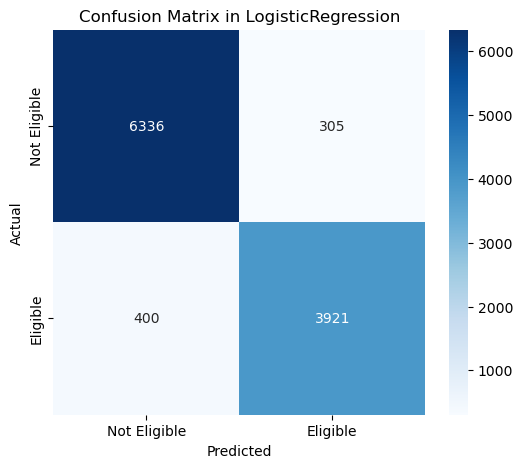

In [93]:
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix in LogisticRegression')
plt.show()

In [95]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Predicted']
comparison_df

,Actual,Predicted,Difference
21745,1,1,0
16752,0,0,0
54788,0,0,0
37233,1,1,0
5421,0,0,0
...,...,...,...
7282,1,1,0
48234,0,0,0
23968,0,0,0
27189,0,0,0


In [97]:
comparison_df["Difference"].value_counts()

Difference
 0    10834
-1      117
 1       11
Name: count, dtype: int64

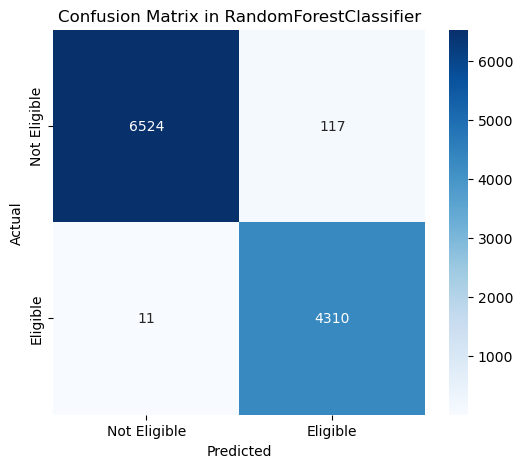

In [99]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix in RandomForestClassifier')
plt.show()

In [101]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Predicted']
comparison_df

,Actual,Predicted,Difference
21745,1,1,0
16752,0,0,0
54788,0,0,0
37233,1,1,0
5421,0,0,0
...,...,...,...
7282,1,1,0
48234,0,0,0
23968,0,0,0
27189,0,0,0


In [103]:
comparison_df['Difference'].value_counts()


Difference
 0    10838
-1      119
 1        5
Name: count, dtype: int64

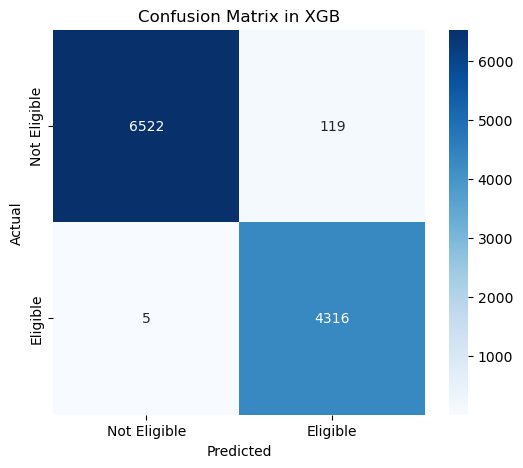

In [105]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix in XGB')
plt.show()

In [107]:
metrics = {
    'Logistic Regression': {
        'accuracy': accuracy_score(y_test, y_pred_lr),
        'precision': precision_score(y_test, y_pred_lr),
        'recall': recall_score(y_test, y_pred_lr),
        'f1': f1_score(y_test, y_pred_lr)
    },
    'Random Forest': {
        'accuracy': accuracy_score(y_test, y_pred_rf),
        'precision': precision_score(y_test, y_pred_rf),
        'recall': recall_score(y_test, y_pred_rf),
        'f1': f1_score(y_test, y_pred_rf)
    },
    'XGBoost': {
        'accuracy': accuracy_score(y_test, y_pred_xgb),
        'precision': precision_score(y_test, y_pred_xgb),
        'recall': recall_score(y_test, y_pred_xgb),
        'f1': f1_score(y_test, y_pred_xgb)
    }
}

In [109]:
for model, scores in metrics.items():
    print(f"Performance metrics for {model}:")
    print(f"Accuracy: {scores['accuracy']:.4f}")
    print(f"Precision: {scores['precision']:.4f}")
    print(f"Recall: {scores['recall']:.4f}")
    print(f"F1 Score: {scores['f1']:.4f}")
    print("-" * 50)

Performance metrics for Logistic Regression:
Accuracy: 0.9357
Precision: 0.9278
Recall: 0.9074
F1 Score: 0.9175
--------------------------------------------------
Performance metrics for Random Forest:
Accuracy: 0.9883
Precision: 0.9736
Recall: 0.9975
F1 Score: 0.9854
--------------------------------------------------
Performance metrics for XGBoost:
Accuracy: 0.9887
Precision: 0.9732
Recall: 0.9988
F1 Score: 0.9858
--------------------------------------------------


In [111]:
import pandas as pd
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


           Logistic Regression  Random Forest   XGBoost
accuracy              0.935687       0.988323  0.988688
precision             0.927828       0.973571  0.973168
recall                0.907429       0.997454  0.998843
f1                    0.917515       0.985368  0.985838


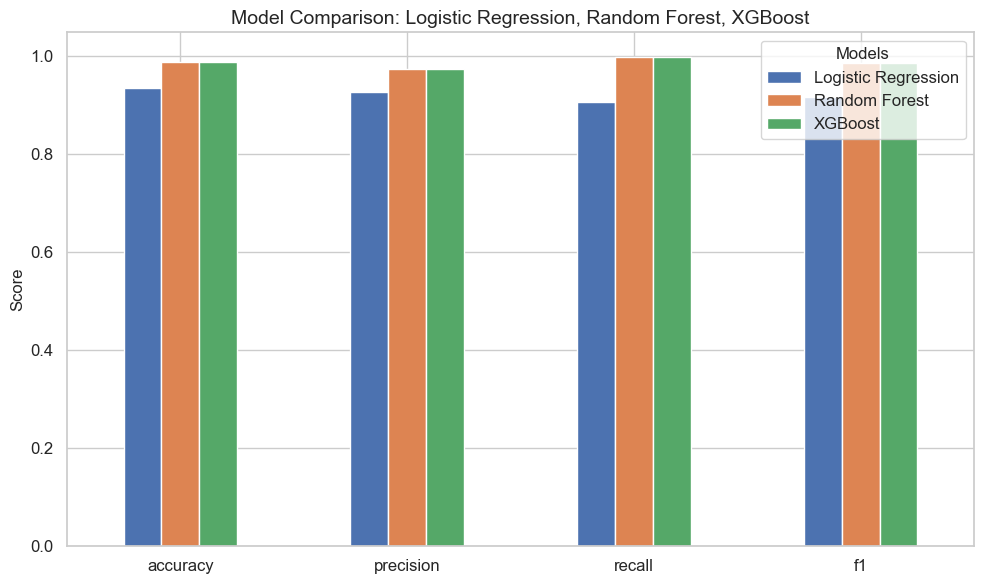

In [117]:
sns.set(style="whitegrid")
metrics_df.plot(kind='bar', figsize=(10, 6), ax=plt.gca())
plt.title('Model Comparison: Logistic Regression, Random Forest, XGBoost', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Models', fontsize=12)
plt.tight_layout()
plt.show()

In [122]:
log_reg_params = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}
log_reg_grid = GridSearchCV(pipeline_lr, log_reg_params, cv=5, scoring='accuracy', n_jobs=-1)
log_reg_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         ['no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'awards_won',
                                                                          'avg_training_score']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['department',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel'])])),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring='accuracy')

In [124]:
rf_params = {
    'classifier__n_estimators': [50, 100, 200], 
    'classifier__max_depth': [5, 10, 15, None],  
    'classifier__min_samples_split': [2, 5, 10],  
    'classifier__min_samples_leaf': [1, 2, 4] 
}
rf_grid = GridSearchCV(pipeline_rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         ['no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'awards_won',
                                                                          'avg_training_score']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='mos...,
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['department',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [5, 10, 15, None],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
xgb_params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0]
}
xgb_grid = GridSearchCV(pipeline_xgb, xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

In [ ]:
final_metrics = {
    'Logistic Regression': {
        'accuracy': accuracy_score(y_test, y_pred_lr),
        'precision': precision_score(y_test, y_pred_lr),
        'recall': recall_score(y_test, y_pred_lr),
        'f1': f1_score(y_test, y_pred_lr)
    },
    'Random Forest': {
        'accuracy': accuracy_score(y_test, y_pred_rf),
        'precision': precision_score(y_test, y_pred_rf),
        'recall': recall_score(y_test, y_pred_rf),
        'f1': f1_score(y_test, y_pred_rf)
    },
    'XGBoost': {
        'accuracy': accuracy_score(y_test, y_pred_xgb),
        'precision': precision_score(y_test, y_pred_xgb),
        'recall': recall_score(y_test, y_pred_xgb),
        'f1': f1_score(y_test, y_pred_xgb)
    }
}

In [ ]:
for model, scores in final_metrics.items():
    print(f"Performance metrics for {model}:")
    print(f"Accuracy: {scores['accuracy']:.4f}")
    print(f"Precision: {scores['precision']:.4f}")
    print(f"Recall: {scores['recall']:.4f}")
    print(f"F1 Score: {scores['f1']:.4f}")
    print("-" * 50)

In [ ]:
final_metrics_df = pd.DataFrame(final_metrics).T
final_metrics_df

In [ ]:
sns.set(style="whitegrid")
final_metrics_df.plot(kind='bar', figsize=(10, 6), ax=plt.gca())
plt.title('Model Comparison: Logistic Regression, Random Forest, XGBoost', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Models', fontsize=12)
plt.tight_layout()
plt.show()